In [1]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split, GridSearchCV
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
face_data = fetch_lfw_people(min_faces_per_person=80)

In [4]:
unique_targets = np.unique(face_data.target)
print(unique_targets)

[0 1 2 3 4]


In [5]:
X = face_data.data
Y = face_data.target
print("Input data size",X.shape)
print("Output data size: ",Y.shape)
print("Label names: ",face_data.target_names)

Input data size (1140, 2914)
Output data size:  (1140,)
Label names:  ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [6]:
for i in range(5):
    print("Class {} has {} samples.".format(i, (Y==i).sum()))

Class 0 has 236 samples.
Class 1 has 121 samples.
Class 2 has 530 samples.
Class 3 has 109 samples.
Class 4 has 144 samples.


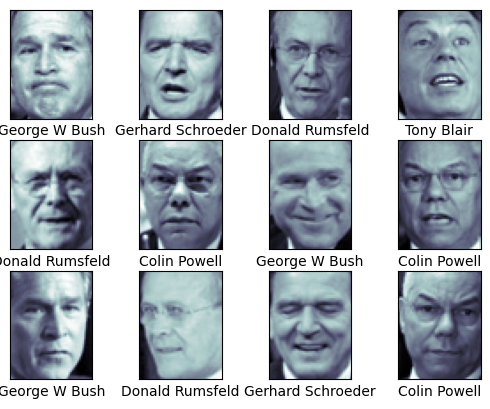

In [7]:
fig,ax = plt.subplots(3,4)
for i,axi in enumerate(ax.flat):
    axi.imshow(face_data.images[i],cmap="bone")
    axi.set(xticks=[],yticks=[],xlabel=face_data.target_names[face_data.target[i]])

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [9]:
model = tf.keras.Sequential([
    layers.Reshape((62, 47, 1), input_shape=(2914,)),
    
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(len(face_data.target_names), activation='softmax')
])

learning_rate = 0.0032  
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

loss, accuracy = model.evaluate(X_test, Y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Epoch 1/10
27/27 [==============================] - 4s 86ms/step - loss: 1.4237 - accuracy: 0.4713 - val_loss: 1.4074 - val_accuracy: 0.4456
Epoch 2/10
27/27 [==============================] - 2s 68ms/step - loss: 1.3113 - accuracy: 0.4877 - val_loss: 1.2162 - val_accuracy: 0.5368
Epoch 3/10
27/27 [==============================] - 2s 67ms/step - loss: 1.0338 - accuracy: 0.6058 - val_loss: 0.9570 - val_accuracy: 0.6140
Epoch 4/10
27/27 [==============================] - 2s 68ms/step - loss: 0.6844 - accuracy: 0.7778 - val_loss: 0.6163 - val_accuracy: 0.7684
Epoch 5/10
27/27 [==============================] - 2s 73ms/step - loss: 0.4459 - accuracy: 0.8409 - val_loss: 0.4244 - val_accuracy: 0.8456
Epoch 6/10
27/27 [==============================] - 2s 68ms/step - loss: 0.3101 - accuracy: 0.9076 - val_loss: 0.3612 - val_accuracy: 0.8772
Epoch 7/10
27/27 [==============================] - 2s 68ms/step - loss: 0.2667 - accuracy: 0.9064 - val_loss: 0.3481 - val_accuracy: 0.8737
Epoch 8/10
27

9/9 [==============================] - 0s 15ms/step


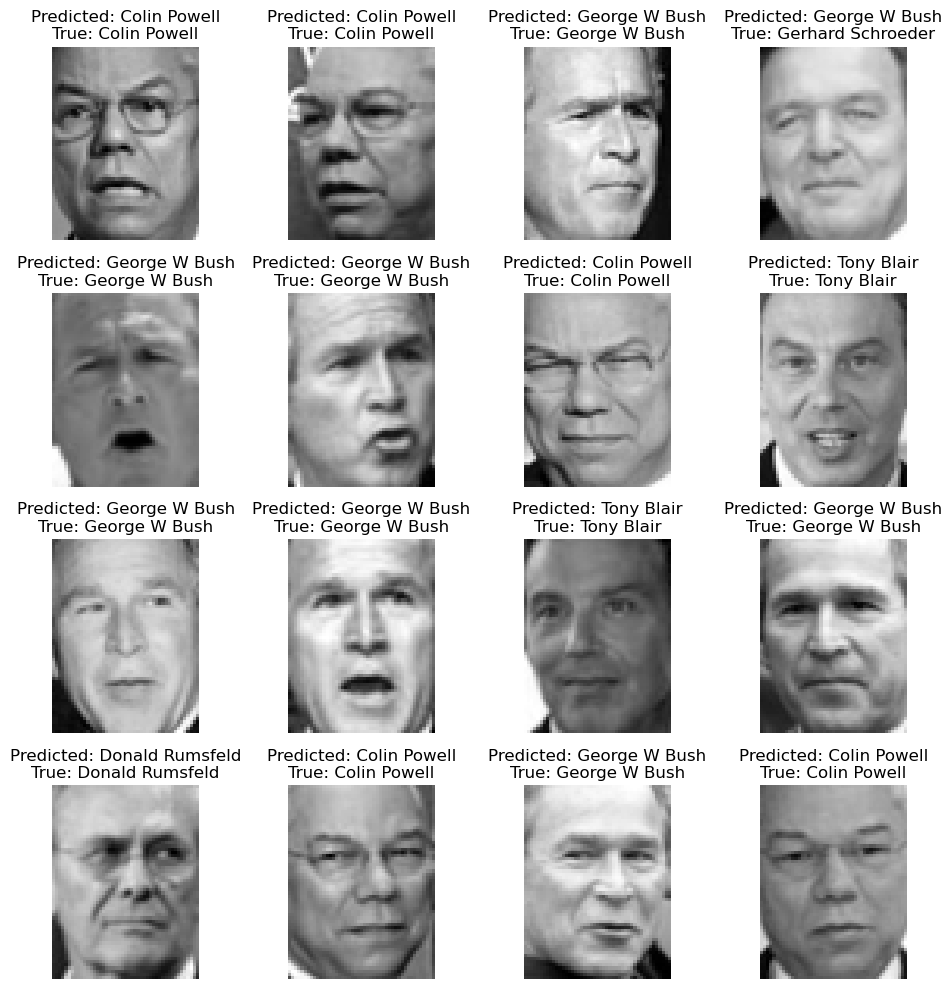

In [10]:
predicted_labels = np.argmax(model.predict(X_test), axis=1)
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.ravel()

for i in range(16):
    axes[i].imshow(X_test[i].reshape(62, 47), cmap='gray')
    axes[i].set_title(f"Predicted: {face_data.target_names[predicted_labels[i]]}\nTrue: {face_data.target_names[Y_test[i]]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()